# Optimization Problem
## Simulation with only 2 focus

First, we load the libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from scipy import signal
from PIL import Image

Then, we define a function to generate to focus on a map given the distance of the the focus and the size of the map

In [11]:
def sources_s(dist,sx,sy):
    # sx = len(hfilter[0])
    # sy = len(hfilter)
    output=np.zeros((sy,sx), dtype=int) #Generates a sy by sx null matrix
    output[math.floor(sy/2),math.ceil((sx-1)/2-dist)]=1  #Sets to 1 a position at distance -dist respect to the center
    output[math.floor(sy/2),math.floor((sx-1)/2+dist)]=1 #Sets to 1 a position at distance +dist respect to the center
    return output

We upload the filter and we calculate its size

In [3]:
# Import filter (h(t))
h = mpimg.imread('images/pic0001.jpg')
h = h[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.
size_x = len(h[0])
size_y = len(h)
print(h.shape)  #[Y,X]

(2464, 3280)


We generate an example of output ys(t) based on a an input xs(t) with distance = 1000.

In [5]:
distance = 1000
xs=sources_s(distance, size_x,size_y)
print("x ok")
ys= signal.convolve2d(xs, h, boundary='symm', mode='same')
print("y ok")

After 20 minutes, the execution has not finished. We need to find another implementation of the convolution or reduce the image size.

First, we try to reduce the image by 4.

In [10]:
# Import filter (h(t))
h = Image.open('images/pic0001.jpg')
realsize=h.size
print(realsize)
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)
print(newsize)
h=h.resize(newsize,Image.ANTIALIAS)
h = np.array(h)
h = h[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.
size_x = len(h[0])
size_y = len(h)
print(h.shape) #[Y,X]
print(size_x)
print(size_y)

(3280, 2464)
(820, 616)
(616, 820)
820
616


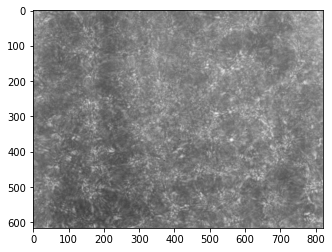

In [11]:
plt.imshow(h, cmap='gray')
plt.show()

Again, we generate an example of output ys(t) based on a an input xs(t) with distance = 250.

In [9]:
distance = 250
xs=sources_s(distance, size_x,size_y)
print("x ok")
ys= signal.convolve2d(xs, h, boundary='symm', mode='same')
print("y ok")

x ok
y ok


After 12m 39.2s, it has generated an output. If we want to computate it for a certain range of distances, this time is not valid. We have to find another way.

We implement fftconvolve(). It is the same as comvolve2D() but it uses de FFT trick.

In [12]:
# Import filter (h(t))
h = mpimg.imread('images/pic0001.jpg')
h = h[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.
size_x = len(h[0])
size_y = len(h)
print(h.shape)  #[Y,X]

(2464, 3280)


Again, we generate an example of output ys(t) based on a an input xs(t) with distance = 1000.

In [13]:
distance = 1000
xs=sources_s(distance, size_x,size_y)
print("x ok")
ys= signal.fftconvolve(xs, h, mode='same')
print("y ok")

x ok
y ok


After 3s, it has generated an output. If we want to computate it for a certain range of distances, this time IS  valid. We continue with this function.

Now, we implement the optiminization.